/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=axs[i], palette="viridis")
/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=axs[i], palette="viridis")
/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=a

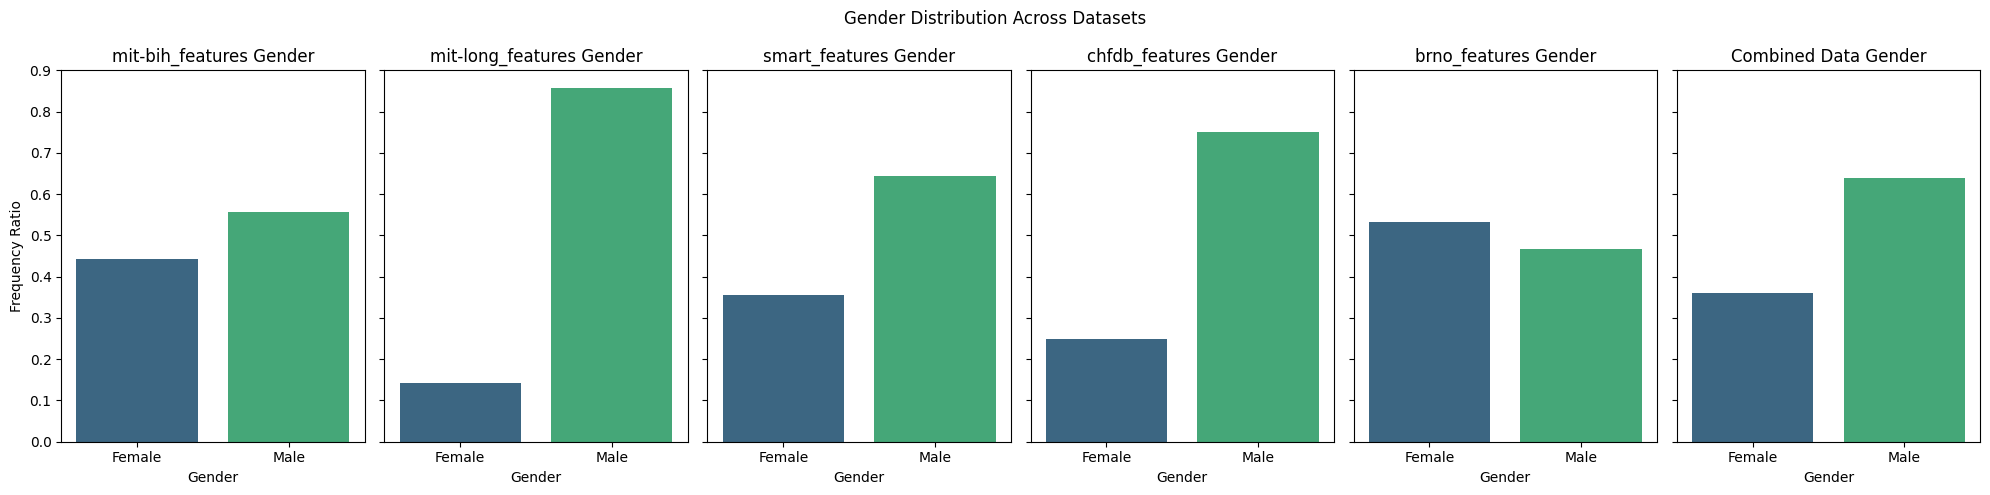

/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=axs[i], palette="viridis")
/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=axs[i], palette="viridis")
/var/folders/7x/spz5mh3s2x3by44zznhqsvm00000gn/T/ipykernel_14676/706052114.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratios.index, y=ratios.values, ax=a

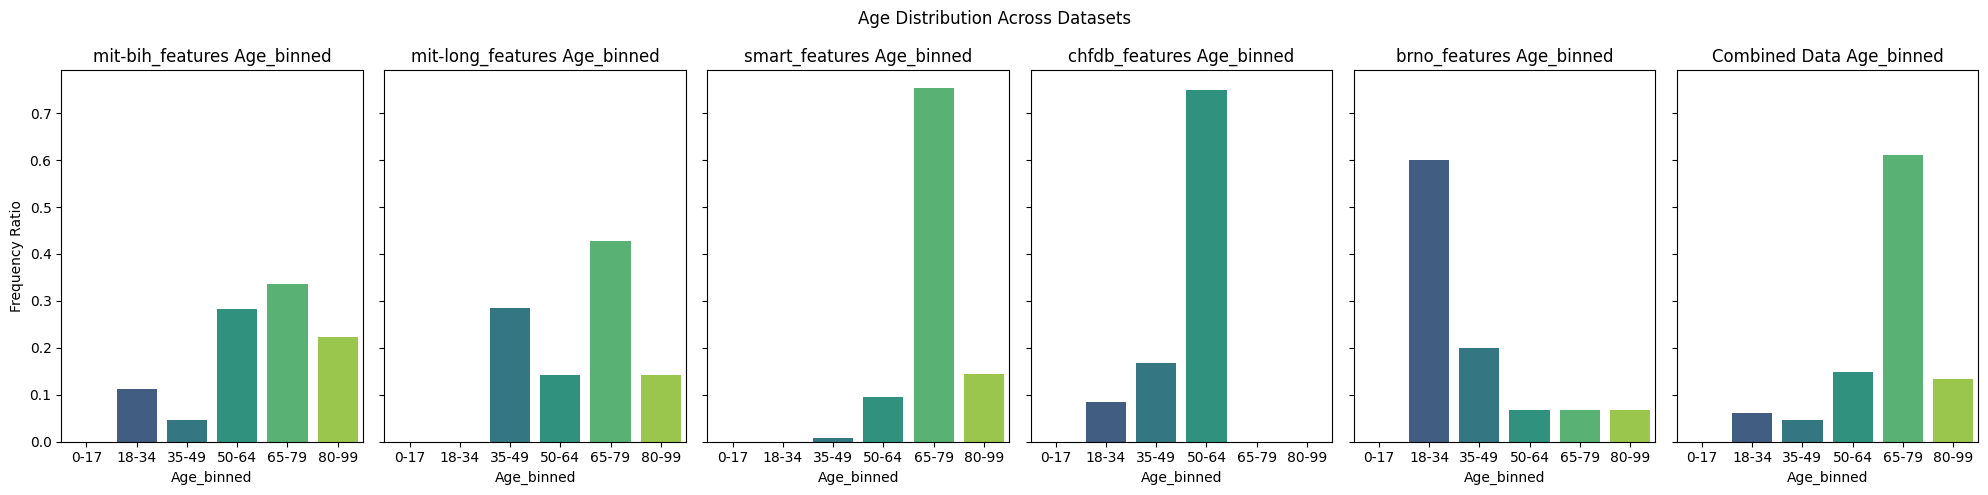

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

def load_data(dataset_paths):
    data_frames = []
    for path in dataset_paths:
        files = glob.glob(path + '*.csv')
        for file in files:
            df = pd.read_csv(file)
            df['Dataset'] = path.strip('/')  # Tag data with its source
            data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

def plot_distribution(data, datasets, category, title):
    # Create figure
    fig, axs = plt.subplots(1, len(datasets) + 1, figsize=(20, 5), sharey=True)
    
    # Plot for each dataset
    for i, dataset in enumerate(datasets):
        subset = data[data['Dataset'] == dataset]
        total = subset[category].count()  # Total number of non-NaN data for normalization
        if category == 'Age_binned':
            counts = subset[category].value_counts().reindex(age_labels, fill_value=0)
        else:
            counts = subset[category].value_counts().sort_index()
        ratios = counts / total  # Normalize to get ratios
        sns.barplot(x=ratios.index, y=ratios.values, ax=axs[i], palette="viridis")
        axs[i].set_title(f'{dataset} {category}')
        axs[i].set_xlabel(category)
        axs[i].set_ylabel('Frequency Ratio')
    
    # Plot for combined data
    total_combined = data[category].count()  # Total for combined data normalization
    if category == 'Age_binned':
        combined_counts = data[category].value_counts().reindex(age_labels, fill_value=0)
    else:
        combined_counts = data[category].value_counts().sort_index()
    combined_ratios = combined_counts / total_combined  # Normalize to get ratios
    sns.barplot(x=combined_ratios.index, y=combined_ratios.values, ax=axs[-1], palette="viridis")
    axs[-1].set_title(f'Combined Data {category}')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Define paths to datasets
dataset_paths = [
    'mit-bih_features/', 'mit-long_features/', 'smart_features/',
    'chfdb_features/', 'brno_features/'
]
datasets = [path.strip('/') for path in dataset_paths]

# Load and preprocess data
combined_data = load_data(dataset_paths)
combined_data['Gender'] = combined_data['Gender'].replace({'m': 'M', 'f': 'F'}).map({'M': 'Male', 'F': 'Female'})
combined_data.dropna(subset=['Gender', 'Age'], inplace=True)

# Define age bins and labels
age_bins = [0, 18, 35, 50, 65, 80, 100]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
combined_data['Age_binned'] = pd.cut(combined_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create plots for gender and age distribution
plot_distribution(combined_data, datasets, 'Gender', 'Gender Distribution Across Datasets')
plot_distribution(combined_data, datasets, 'Age_binned', 'Age Distribution Across Datasets')
